# Computer Vision 

# Exercise 4: Edge detection

- TU Chemnitz
    - Fak. für Informatik
        - Professur Künstliche Intelligenz
            - Lehre
                - Bildverstehen
     
Contact:
* julien dot vitay at informatik dot tu-chemnitz dot de
* abbas dot al-ali at informatik dot tu-chemnitz dot de

Course web page:
[https://www.tu-chemnitz.de/informatik/KI/edu/biver/](https://www.tu-chemnitz.de/informatik/KI/edu/biver/)

# Edge detection

The goal is to perform edge detection on the four provided images:

<img src="img/images.png" alt="img/images.png" width="600"/>

They should be opened as grayscale:

```python
img = cv2.imread('lena.jpg', 0)
```

In principle, high-pass filters are computed as blurring filters with `filter2D`:

```python
edge_filter = np.array(
    [
        [-1, -1, -1],
        [ 0,  0,  0],
        [ 1,  1,  1]
    ]
)
result = cv2.filter2D(img, cv2.CV_64F, edge_filter)
```

- The only difference is the returned image **must** have floating-point values (`cv2.CV_64F` or `np.float`), as the filtering operation can return positive or negative values.

- To visualize the result, it is therefore better to use matplotlib:

```python
plt.imshow(result, cmap=plt.cm.gray)
plt.xticks([]); plt.yticks([])
plt.colorbar()
plt.show()
```

- `plt.colorbar()` allows to see which range the pixel values have.

+ **Task 1:** Apply the `edge_filter` on the `lena.jpg`:

In [1]:
from __future__ import print_function

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import cv2

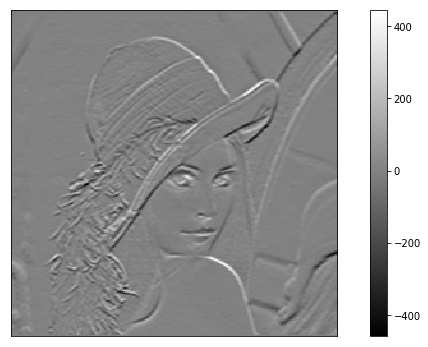

In [18]:
img = cv2.imread('lena.jpg', 0)

edge_filter = np.array(
    [
        [-1, -1, -1],
        [ 0,  0,  0],
        [ 1,  1,  1]
    ]
)

result = cv2.filter2D(img, cv2.CV_64F, edge_filter)
plt.figure(figsize=(12,6))
plt.imshow(result, cmap=plt.cm.gray)
plt.xticks([]); plt.yticks([])
plt.colorbar()
plt.show()

## Central differences

+ **Task 2:** Apply the central-differences filters on each of the four images:

$$
\text{CD}_x = \begin{bmatrix} -1 & 0 & 1 \\ \end{bmatrix} \qquad \text{CD}_y = \begin{bmatrix} -1 \\ 0 \\ 1 \\ \end{bmatrix} 
$$

Visualize:

* The result of each filter one the image: $\nabla_x I$ and $\nabla_y I$.

* The edge strength using the sum of the absolute values (`np.absolute()`) of the two filtered images:

$$
    |\nabla I| = |\nabla_x I| + |\nabla_y I| 
$$

* The thresholded edge strength at 50 (vary the threshold).

**Manipulating a floating-point image**

* The `threshold()` method will not work if you pass it a floating-point image, especially when its values are between -1000 and 1000.

* You first need to scale it between 0 and 255 with the ``normalize()`` method:

```python
result = cv2.normalize(strength, None, 0.0, 255.0, cv2.NORM_MINMAX)
```

* and then to convert it to unsigned integers on 8 bits:

```python
result = result.astype(np.uint8)
```

* In one line:

```python
result = cv2.normalize(strength, None, 0.0, 255.0, cv2.NORM_MINMAX).astype(np.uint8)
```

In [4]:
img = cv2.imread('lena.jpg', 0)
#img = cv2.imread('einstein.jpg', 0)
#img = cv2.imread('geometric.jpg', 0)
#img = cv2.imread('noise.jpg', 0)

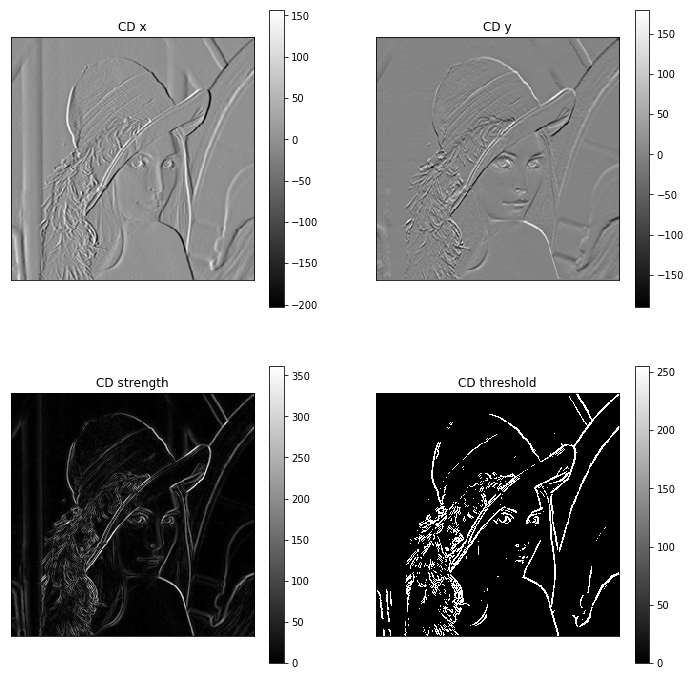

In [21]:
# Central-differences filter
cd_filter_x = np.array(
    [
        [-1,  0,  1]
    ]
)
cd_filter_y = np.array(
    [
        [ -1 ],
        [  0 ],
        [  1 ]
    ]
)
cd_x = cv2.filter2D(img, cv2.CV_64F, cd_filter_x)
cd_y = cv2.filter2D(img, cv2.CV_64F, cd_filter_y)
cd_strength = np.absolute(cd_x) + np.absolute(cd_y)
cd_strength_norm = cv2.normalize(cd_strength, None, 0.0, 255.0, cv2.NORM_MINMAX).astype(np.uint8)
ret, cd_threshold = cv2.threshold(cd_strength_norm, 50, 255, cv2.THRESH_BINARY)
plt.figure(figsize=(12,12))
plt.subplot(221)
plt.imshow(cd_x, cmap=plt.cm.gray)
plt.xticks([]);plt.yticks([])
plt.title('CD x')
plt.colorbar()
plt.subplot(222)
plt.imshow(cd_y, cmap=plt.cm.gray)
plt.xticks([]); plt.yticks([])
plt.title('CD y')
plt.colorbar()
plt.subplot(223)
plt.imshow(cd_strength, cmap=plt.cm.gray)
plt.xticks([]);plt.yticks([])
plt.title('CD strength')
plt.colorbar()
plt.subplot(224)
plt.imshow(cd_threshold, cmap=plt.cm.gray)
plt.xticks([]);plt.yticks([])
plt.title('CD threshold')
plt.colorbar()
plt.show()

## Sobel filter

- **Task 3:** Do the same as in task 2 using the **Sobel filter**:

$$
    \text{Sobel}_x = \begin{bmatrix} -1 & 0 & 1 \\ -2 & 0 & 2 \\ -1 & 0 & 1 \\ \end{bmatrix} \qquad \text{Sobel}_y = \begin{bmatrix} -1 & -2 & -1 \\ 0 & 0 & 0\\ 1 & 2 & 1\\ \end{bmatrix} 
$$

- Compare the performance of the central-differences and Sobel filters on the four images.

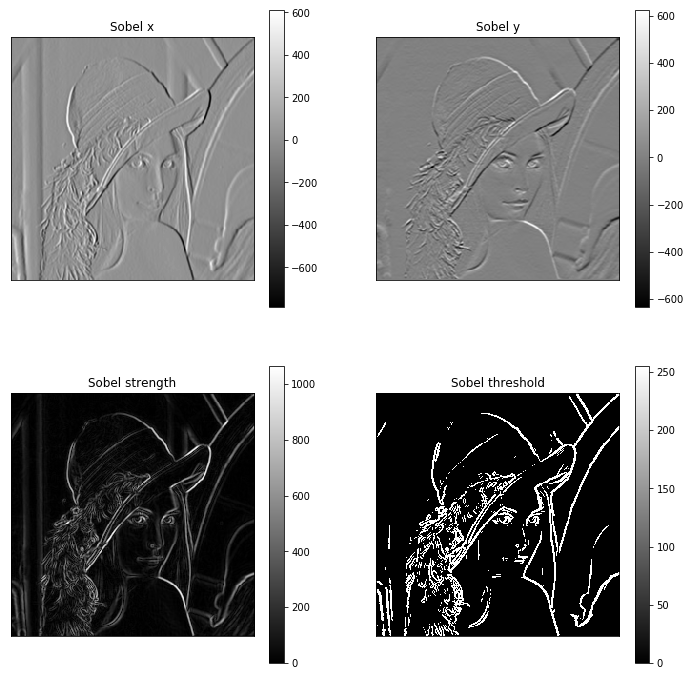

In [22]:
# Sobel 3x3
sobel_filter_x = np.array(
    [
        [-1,  0,  1],
        [-2,  0,  2],
        [-1,  0,  1],
    ]
)
sobel_filter_y = np.array(
    [
        [-1, -2, -1],
        [ 0,  0,  0],
        [ 1,  2,  1],
    ]
)
sobel_x = cv2.filter2D(img, cv2.CV_64F, sobel_filter_x)
sobel_y = cv2.filter2D(img, cv2.CV_64F, sobel_filter_y)
sobel_strength = np.absolute(sobel_x) + np.absolute(sobel_y)
sobel_strength_norm = cv2.normalize(sobel_strength, None, 0.0, 255.0, cv2.NORM_MINMAX).astype(np.uint8)
ret, sobel_threshold = cv2.threshold(sobel_strength_norm, 50, 255, cv2.THRESH_BINARY)
plt.figure(figsize=(12,12))
plt.subplot(221)
plt.imshow(sobel_x, cmap=plt.cm.gray)
plt.xticks([]); plt.yticks([])
plt.title('Sobel x')
plt.colorbar()
plt.subplot(222)
plt.imshow(sobel_y, cmap=plt.cm.gray)
plt.xticks([]); plt.yticks([])
plt.title('Sobel y')
plt.colorbar()
plt.subplot(223)
plt.imshow(sobel_strength, cmap=plt.cm.gray)
plt.xticks([]); plt.yticks([])
plt.title('Sobel strength')
plt.colorbar()
plt.subplot(224)
plt.imshow(sobel_threshold, cmap=plt.cm.gray)
plt.xticks([]); plt.yticks([])
plt.title('Sobel threshold')
plt.colorbar()
plt.show()

- **Task 4:** The Sobel filter can be applied directly in OpenCV:

```python
sobel_x = cv2.Sobel(img, cv2.CV_64F, dx=1, dy=0, ksize=5)
```

* `dx` and `dy` control the direction of the filter: (1, 0) horizontal, (0, 1) vertical.

* `ksize` is the size of the filter (here 5x5).


- Apply the Sobel filters and compute the thresholded edge strength for various kernel sizes (5x5, 7x7, ...)

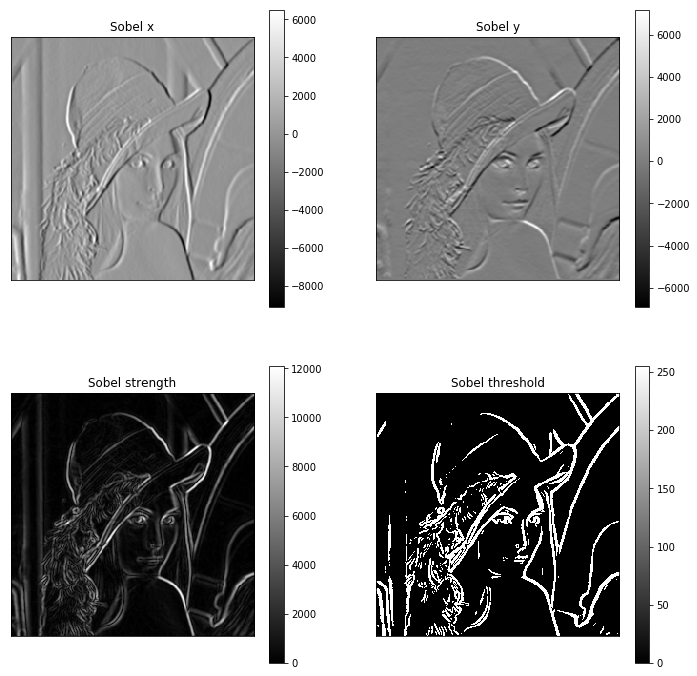

In [24]:
# Sobel 5x5
sobel2_x = cv2.Sobel(img, cv2.CV_64F, dx=1, dy=0, ksize=5)
sobel2_y = cv2.Sobel(img, cv2.CV_64F, dx=0, dy=1, ksize=5)
sobel2_strength = np.absolute(sobel2_x) + np.absolute(sobel2_y)
sobel2_strength_norm = cv2.normalize(sobel2_strength, None, 0.0, 255.0, cv2.NORM_MINMAX).astype(np.uint8)
ret, sobel2_threshold = cv2.threshold(sobel2_strength_norm, 50, 255, cv2.THRESH_BINARY)
plt.figure(figsize=(12,12))
plt.subplot(221)
plt.imshow(sobel2_x, cmap=plt.cm.gray)
plt.xticks([]); plt.yticks([])
plt.title('Sobel x')
plt.colorbar()
plt.subplot(222)
plt.imshow(sobel2_y, cmap=plt.cm.gray)
plt.xticks([]); plt.yticks([])
plt.title('Sobel y')
plt.colorbar()
plt.subplot(223)
plt.imshow(sobel2_strength, cmap=plt.cm.gray)
plt.xticks([]); plt.yticks([])
plt.title('Sobel strength')
plt.colorbar()
plt.subplot(224)
plt.imshow(sobel2_threshold, cmap=plt.cm.gray)
plt.xticks([]); plt.yticks([])
plt.title('Sobel threshold')
plt.colorbar()
plt.show()

## Scharr filter

- **Task 5:** Apply the 3x3 Scharr filter and compare:

```python
scharr_x = cv2.Scharr(img, cv2.CV_64F, dx=1, dy=0)
```

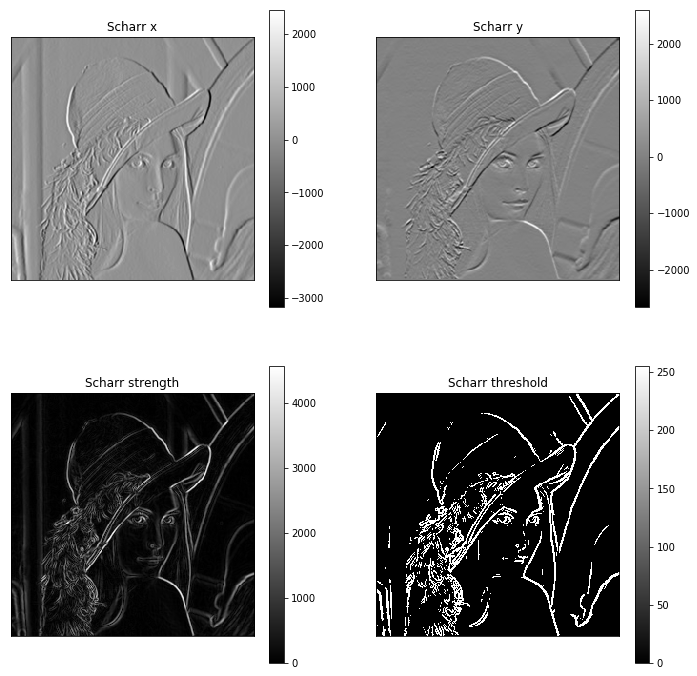

In [25]:
# Scharr
scharr_x = cv2.Scharr(img, cv2.CV_64F, dx=1, dy=0)
scharr_y = cv2.Scharr(img, cv2.CV_64F, dx=0, dy=1)
scharr_strength = np.absolute(scharr_x) + np.absolute(scharr_y)
scharr_strength_norm = cv2.normalize(scharr_strength, None, 0.0, 255.0, cv2.NORM_MINMAX).astype(np.uint8)
ret, scharr_threshold = cv2.threshold(scharr_strength_norm, 50, 255, cv2.THRESH_BINARY)
plt.figure(figsize=(12,12))
plt.subplot(221)
plt.imshow(scharr_x, cmap=plt.cm.gray)
plt.xticks([]); plt.yticks([])
plt.title('Scharr x')
plt.colorbar()
plt.subplot(222)
plt.imshow(scharr_y, cmap=plt.cm.gray)
plt.xticks([]); plt.yticks([])
plt.title('Scharr y')
plt.colorbar()
plt.subplot(223)
plt.imshow(scharr_strength, cmap=plt.cm.gray)
plt.xticks([]); plt.yticks([])
plt.title('Scharr strength')
plt.colorbar()
plt.subplot(224)
plt.imshow(scharr_threshold, cmap=plt.cm.gray)
plt.xticks([]); plt.yticks([])
plt.title('Scharr threshold')
plt.colorbar()
plt.show()

## Comparison of edge filters

- **Task 6:** 
    - Visualize the end result of the four filters (Central-differences, Sobel3x3, Sobel5x5, Scharr).
    - Compare their performance of the  on the four images.
    - Conclude on the advantages / drawbacks of each filter.

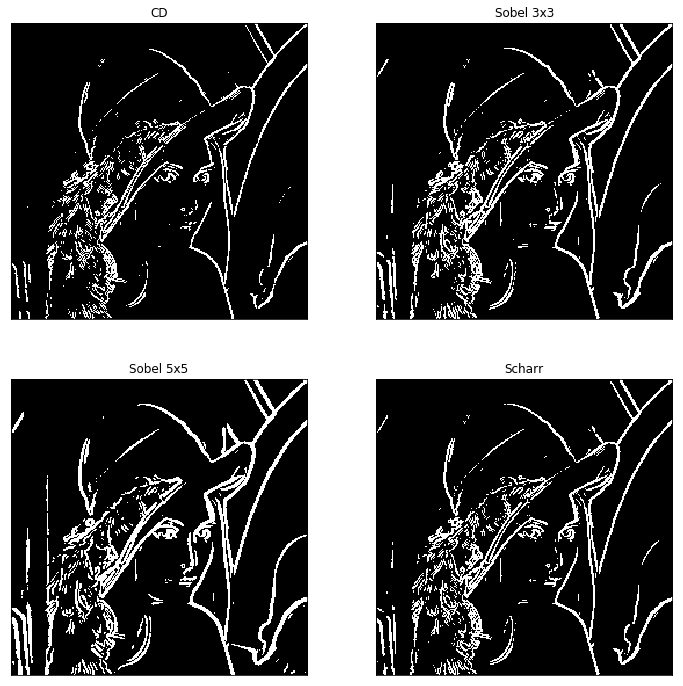

In [26]:
# Comparison of edge detectors
plt.figure(figsize=(12,12))
plt.subplot(221)
plt.imshow(cd_threshold, cmap=plt.cm.gray)
plt.xticks([]); plt.yticks([])
plt.title('CD')
plt.subplot(222)
plt.imshow(sobel_threshold, cmap=plt.cm.gray)
plt.xticks([]); plt.yticks([])
plt.title('Sobel 3x3')
plt.subplot(223)
plt.imshow(sobel2_threshold, cmap=plt.cm.gray)
plt.xticks([]); plt.yticks([])
plt.title('Sobel 5x5')
plt.subplot(224)
plt.imshow(scharr_threshold, cmap=plt.cm.gray)
plt.xticks([]); plt.yticks([])
plt.title('Scharr')
plt.show()

## Optional: Sobel filter on videos

- **Task 7 (Optional):** Apply the Sobel5x5 filter on the video `video.ogv`.


<img src="img/sobel_video.png" alt="img/sobel_video.png" width="300"/>

```python
# Video 
cap = cv2.VideoCapture('video.ogv')
out = cv2.VideoWriter('output-sobel.ogv', 
                      fourcc=cv2.VideoWriter_fourcc(*'THEO'), 
                      fps=30.0, frameSize=(560,320))
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == True:
        frame = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        sobel_x = cv2.Sobel(frame, cv2.CV_64F, 1, 0, ksize=5)
        sobel_y = cv2.Sobel(frame, cv2.CV_64F, 0, 1, ksize=5)
        sobel_strength = np.absolute(sobel_x) + np.absolute(sobel_y)
        sobel_strength_norm = cv2.normalize(
            sobel_strength, None, 0.0, 255.0, cv2.NORM_MINMAX).astype(np.uint8)
        ret, sobel_threshold = cv2.threshold(
            sobel_strength_norm, 30, 255, cv2.THRESH_BINARY)
        out.write(cv2.cvtColor(sobel_threshold, cv2.COLOR_GRAY2BGR))
    else:
        break
cap.release()
```

In [30]:
# Video 
cap = cv2.VideoCapture('video.ogv')
out = cv2.VideoWriter('output-sobel.ogv', 
                      fourcc=cv2.VideoWriter_fourcc(*'THEO'), 
                      fps=30.0, frameSize=(560,320))
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == True:
        frame = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        sobel_x = cv2.Sobel(frame, cv2.CV_64F, 1, 0, ksize=5)
        sobel_y = cv2.Sobel(frame, cv2.CV_64F, 0, 1, ksize=5)
        sobel_strength = np.absolute(sobel_x) + np.absolute(sobel_y)
        sobel_strength_norm = cv2.normalize(
            sobel_strength, None, 0.0, 255.0, cv2.NORM_MINMAX).astype(np.uint8)
        ret, sobel_threshold = cv2.threshold(
            sobel_strength_norm, 30, 255, cv2.THRESH_BINARY)
        out.write(cv2.cvtColor(sobel_threshold, cv2.COLOR_GRAY2BGR))
    else:
        break
cap.release()

#issue with edge detection for videos. Doesn't create a proper output video

# Laplacian of Gaussian

* Second-order derivatives can also be used for edge detection, using the Laplacian-Of-Gaussian (LoG) filter:

$$
    \nabla^2 h(x, y) = \frac{\partial^2 h(x, y)}{\partial x^2} + \frac{\partial^2 h(x, y)}{\partial y^2}
$$

```python
result = cv2.Laplacian(img, cv2.CV_64F)
```

- **Task 8:** Apply the LoG filter on all four images and conclude.

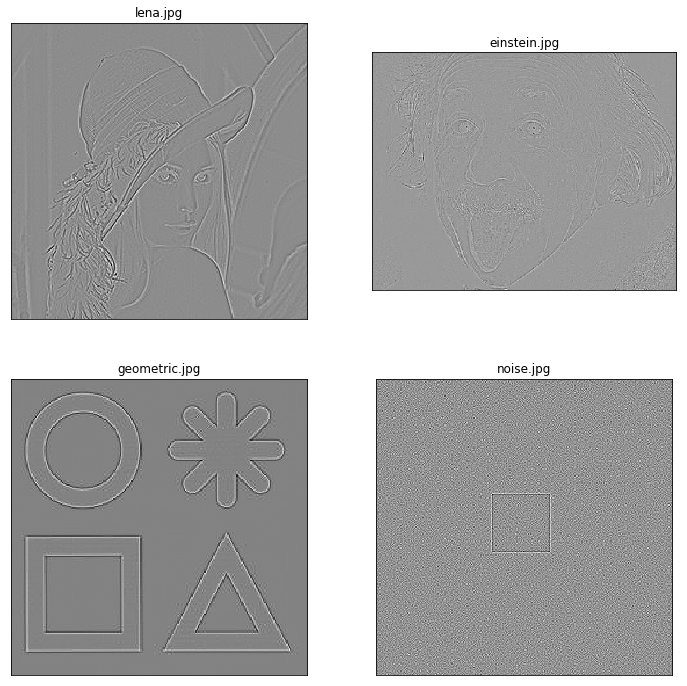

In [32]:
img1 = cv2.imread('lena.jpg', 0)
img2 = cv2.imread('einstein.jpg', 0)
img3 = cv2.imread('geometric.jpg', 0)
img4 = cv2.imread('noise.jpg', 0)
result1 = cv2.Laplacian(img1, cv2.CV_64F)
result2 = cv2.Laplacian(img2, cv2.CV_64F)
result3 = cv2.Laplacian(img3, cv2.CV_64F)
result4 = cv2.Laplacian(img4, cv2.CV_64F)
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.imshow(result1,cmap=plt.cm.gray)
plt.xticks([]);plt.yticks([])
plt.title('lena.jpg')
plt.subplot(2,2,2)
plt.imshow(result2,cmap=plt.cm.gray)
plt.xticks([]);plt.yticks([])
plt.title('einstein.jpg')
plt.subplot(2,2,3)
plt.imshow(result3,cmap=plt.cm.gray)
plt.xticks([]);plt.yticks([])
plt.title('geometric.jpg')
plt.subplot(2,2,4)
plt.imshow(result4,cmap=plt.cm.gray)
plt.xticks([]);plt.yticks([])
plt.title('noise.jpg')
plt.show()

# Laplacian sharpening

* Sharpening an image can be obtained by substracting a fraction of the Log-filtered image from the original image.

$$
    g(x, y) = f(x, y) - \alpha \nabla^2 f(x, y)
$$

- **Task 9:** Find a value for $\alpha$ that produces a correct sharpening for the four images:

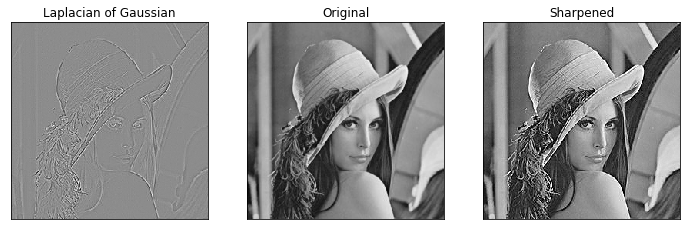

In [33]:
# Laplacian of Gaussian
log = cv2.Laplacian(img, cv2.CV_64F)
sharpened = img.astype(np.float) - 0.5*log
sharpened[sharpened<0] = 0 # Clipping to better compare the two images
sharpened[sharpened>255] = 255
plt.figure(figsize=(12,12))
plt.subplot(131)
plt.imshow(log, cmap=plt.cm.gray)
plt.xticks([]); plt.yticks([])
#plt.colorbar()
plt.title('Laplacian of Gaussian')
plt.subplot(132)
plt.imshow(img, cmap=plt.cm.gray)
plt.xticks([]); plt.yticks([])
#plt.colorbar()
plt.title('Original')
plt.subplot(133)
plt.imshow(sharpened, cmap=plt.cm.gray)
plt.xticks([]); plt.yticks([])
#plt.colorbar()
plt.title('Sharpened')
plt.show()

## Canny edge detection

1. Smoothing with a Gaussian filter (e.g. 5x5).

2. Gradients are computed and four orientations are extracted (vertical, horizontal, 2 diagonals).

3. Non-maximum suppression to thin the edges.

4. Double threshold to remove noise.

5. Hysteresis for edge tracking.

* The **Canny edge detection** algorithm is already implemented in OpenCV:

```python
canny = cv2.Canny(img, 10, 240)
```

* The only free parameters are the **low** and **high** thresholds used for the hysteresis.


- **Task 10:** For each image, find acceptable values for the low and high thresholds, and observe their influence on the level of details extracted by the Canny edge detector:

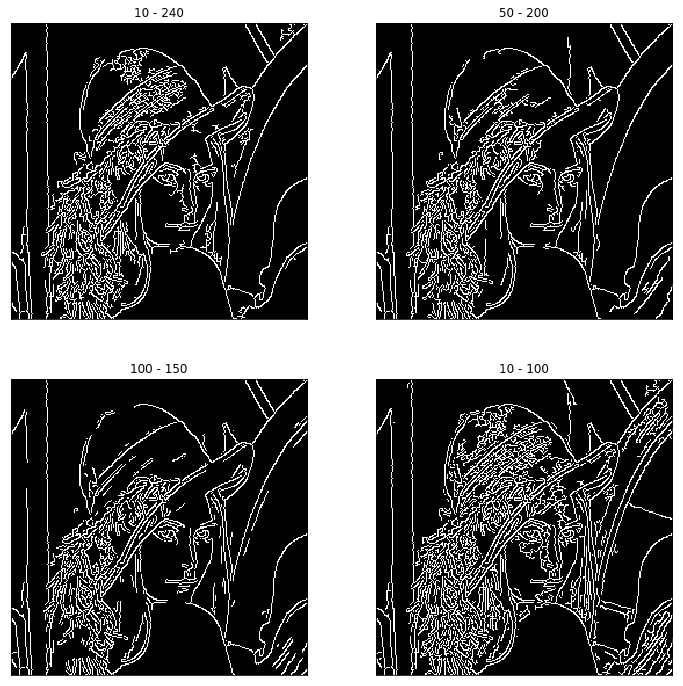

In [34]:
# Canny
canny1 = cv2.Canny(img, 10, 240)
canny2 = cv2.Canny(img, 50, 200)
canny3 = cv2.Canny(img, 100, 150)
canny4 = cv2.Canny(img, 10, 100)
plt.figure(figsize=(12,12))
plt.subplot(221)
plt.imshow(canny1, cmap=plt.cm.gray)
plt.xticks([]); plt.yticks([])
plt.title('10 - 240')
plt.subplot(222)
plt.imshow(canny2, cmap=plt.cm.gray)
plt.xticks([]); plt.yticks([])
plt.title('50 - 200')
plt.subplot(223)
plt.imshow(canny3, cmap=plt.cm.gray)
plt.xticks([]); plt.yticks([])
plt.title('100 - 150')
plt.subplot(224)
plt.imshow(canny4, cmap=plt.cm.gray)
plt.xticks([]); plt.yticks([])
plt.title('10 - 100')
plt.show()

## Automatic Canny edge detection

* An empirical method to find the thresholds is to set them around the **median** pixel intensity, with a variance defining the desired level of details as in the following function:

In [35]:
def auto_canny(image, sigma=0.33):
    "Automatically compute the thresholds for Canny edge detection."
    # Compute the median of the pixel intensities
    v = np.median(image)
       
    # Compute the corresponding thresholds
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    
    # Return the Canny edged image
    return cv2.Canny(image, lower, upper)

- **Task 11:** For each image, try different `sigma` values `(0.1,0.3,0.5,0.7)`:

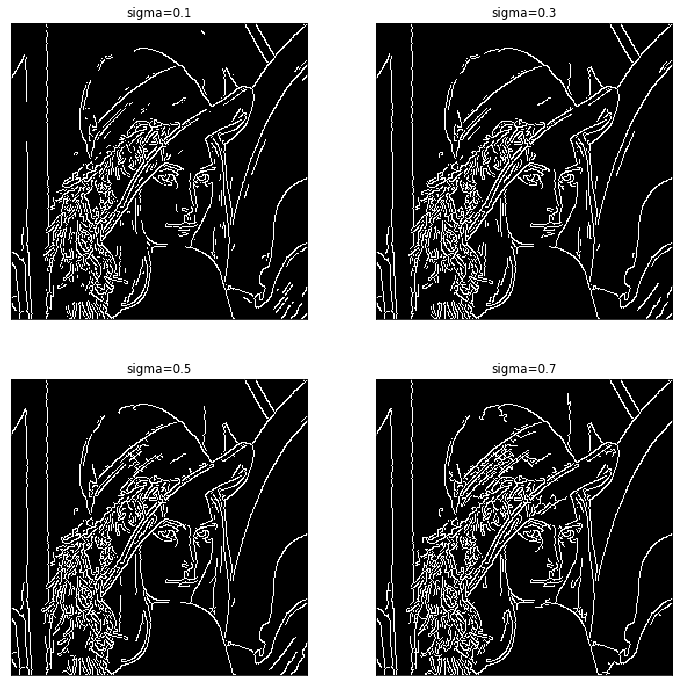

In [36]:
# Automatic Canny
canny1 = auto_canny(img, sigma=0.1)
canny2 = auto_canny(img, sigma=0.3)
canny3 = auto_canny(img, sigma=0.5)
canny4 = auto_canny(img, sigma=0.7)
plt.figure(figsize=(12,12))
plt.subplot(221)
plt.imshow(canny1, cmap=plt.cm.gray)
plt.xticks([]); plt.yticks([])
plt.title('sigma=0.1')
plt.subplot(222)
plt.imshow(canny2, cmap=plt.cm.gray)
plt.xticks([]); plt.yticks([])
plt.title('sigma=0.3')
plt.subplot(223)
plt.imshow(canny3, cmap=plt.cm.gray)
plt.xticks([]); plt.yticks([])
plt.title('sigma=0.5')
plt.subplot(224)
plt.imshow(canny4, cmap=plt.cm.gray)
plt.xticks([]); plt.yticks([])
plt.title('sigma=0.7')
plt.show()

## Optional: Automatic Canny on videos

- **Task 12 (Optional):** Apply the automatic **Canny** filter on the video `video.ogv`.


<img src="img/canny_video.png" alt="img/canny_video.png" width="300"/>

```python
cap = cv2.VideoCapture('video.ogv')
out = cv2.VideoWriter('output-canny.ogv', 
                      fourcc=cv2.VideoWriter_fourcc(*'THEO'), 
                      fps=30.0, frameSize=(560,320))
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == True:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        edges = auto_canny(gray)
        out.write(cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR))
    else:
        break
cap.release()
out.release()
```

In [38]:
cap = cv2.VideoCapture('video.ogv')
out = cv2.VideoWriter('output-canny.ogv', 
                      fourcc=cv2.VideoWriter_fourcc(*'THEO'), 
                      fps=30.0, frameSize=(560,320))
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == True:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        edges = auto_canny(gray)
        out.write(cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR))
    else:
        break
cap.release()
out.release()
#issue with edge detection for videos. Doesn't create a proper output video